In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

# Q1.
### 전국 시도별 약국수를 구해주세요!
- 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.
- 다음의 결과가 나오도록 구합니다.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

### value_counts

In [ ]:
result_1 = df[df['상권업종소분류명'] == '약국']['시도명'].value_counts().reset_index().rename(columns={'시도명': '약국 수', 'index': '시도명'}).sort_values(by='약국 수', ascending=False)
result_1

,시도명,약국 수
0,경기도,4510
1,서울특별시,3579
2,부산광역시,1130
3,경상남도,1017
4,인천광역시,1002
5,경상북도,915
6,대구광역시,870
7,전라북도,862
8,충청남도,830
9,전라남도,811


### groupby

In [ ]:
result_2 = df[df['상권업종소분류명'] == '약국'].groupby('시도명')['상가업소번호'].count().reset_index().rename(columns={'상가업소번호': '약국 수'}).sort_values(by='약국 수', ascending=False).reset_index(drop=True)
result_2

,시도명,약국 수
0,경기도,4510
1,서울특별시,3579
2,부산광역시,1130
3,경상남도,1017
4,인천광역시,1002
5,경상북도,915
6,대구광역시,870
7,전라북도,862
8,충청남도,830
9,전라남도,811


### pivot_table

In [ ]:
result_3 = df[df['상권업종소분류명'] == '약국'].pivot_table(values='상호명', index='시도명', aggfunc='count').reset_index().rename(columns={'상호명': '약국 수'}).sort_values(by='약국 수', ascending=False).reset_index(drop=True)
result_3

,시도명,약국 수
0,경기도,4510
1,서울특별시,3579
2,부산광역시,1130
3,경상남도,1017
4,인천광역시,1002
5,경상북도,915
6,대구광역시,870
7,전라북도,862
8,충청남도,830
9,전라남도,811


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(result_3, *['약국 수'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(result_3, *['약국 수'], **{})
chart

In [ ]:
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt

# apt-get : 패키지 설치 명령어
# -qq : 에러외의 메세지 숨기는 옵션키
!apt-get -qq install fonts-nanum


fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

Selecting previously unselected package fonts-nanum.
(Reading database ... 120875 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


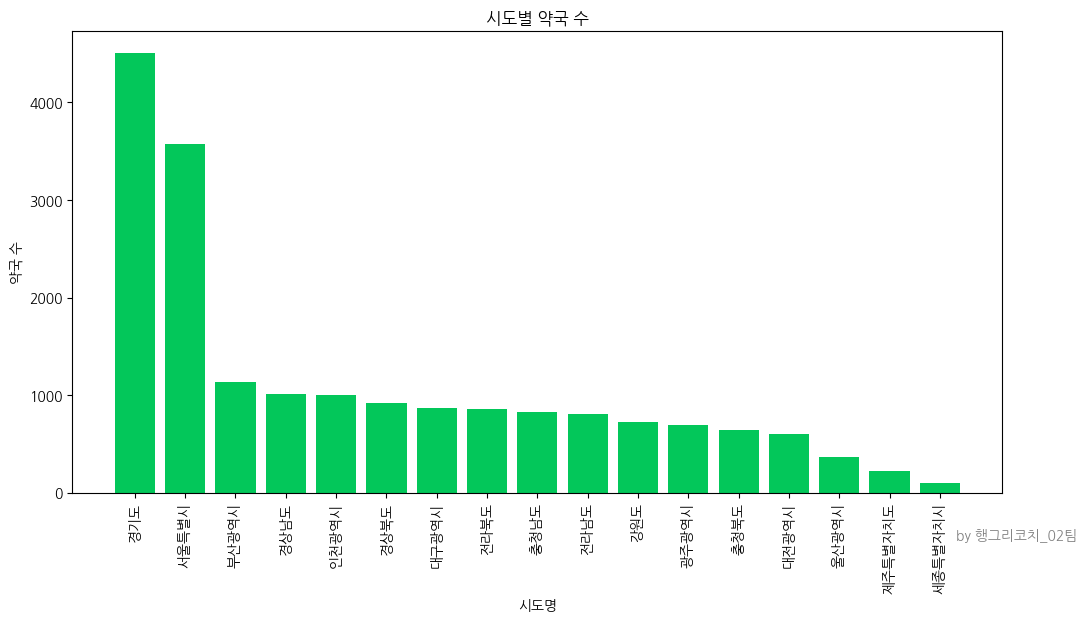

In [ ]:
import matplotlib.pyplot as plt

# 색상 설정
bar_color = '#03C75A'

# result_3 데이터프레임을 사용하여 막대 그래프 생성
plt.figure(figsize=(12, 6))  # 그래프 크기 설정

# 시도명을 x축으로, 약국 수를 y축으로 설정하고 색상을 bar_color로 지정
plt.bar(result_3['시도명'], result_3['약국 수'], color=bar_color)

# 그래프 제목과 축 레이블 설정
plt.title('시도별 약국 수')
plt.xlabel('시도명')
plt.ylabel('약국 수')

# x축 레이블을 90도 회전하여 가독성 향상
plt.xticks(rotation=90)

# 그래프 오른쪽 하단에 작은 텍스트 추가
plt.text(0.95, -0.1, 'by 행그리코치_02팀', fontsize=10, color='gray', transform=plt.gca().transAxes)

# 그래프 표시
plt.show()


# Q2.
### 여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?

- 빈도수를 구하고 시각화 하여 동물병원이 어느 지역에 많은지 분석해 주세요!
- 다음의 결과가 나오도록 구합니다.

In [ ]:
animal_hostpital_by_sido = df[df['상권업종소분류명'] == '동물병원'].groupby('시도명')['상가업소번호'].count()
animal_hostpital_by_sido

시도명
강원도         85
경기도        992
경상남도       161
경상북도       165
광주광역시       71
대구광역시      119
대전광역시       77
부산광역시      153
서울특별시      557
세종특별자치시     13
울산광역시       61
인천광역시      193
전라남도        77
전라북도       111
제주특별자치도     46
충청남도       131
충청북도        75
Name: 상가업소번호, dtype: int64

In [ ]:
animal_hospital_by_sido = df[df['상권업종소분류명'] == '동물병원'].groupby('시도명')['상가업소번호'].count().reset_index().rename(columns={'상가업소번호': '동물병원 수'}).sort_values(by='동물병원 수', ascending=False).reset_index(drop=True)
animal_hospital_by_sido

,시도명,동물병원 수
0,경기도,992
1,서울특별시,557
2,인천광역시,193
3,경상북도,165
4,경상남도,161
5,부산광역시,153
6,충청남도,131
7,대구광역시,119
8,전라북도,111
9,강원도,85


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(animal_hospital_by_sido, *['동물병원 수'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(animal_hospital_by_sido, *['동물병원 수'], **{})
chart

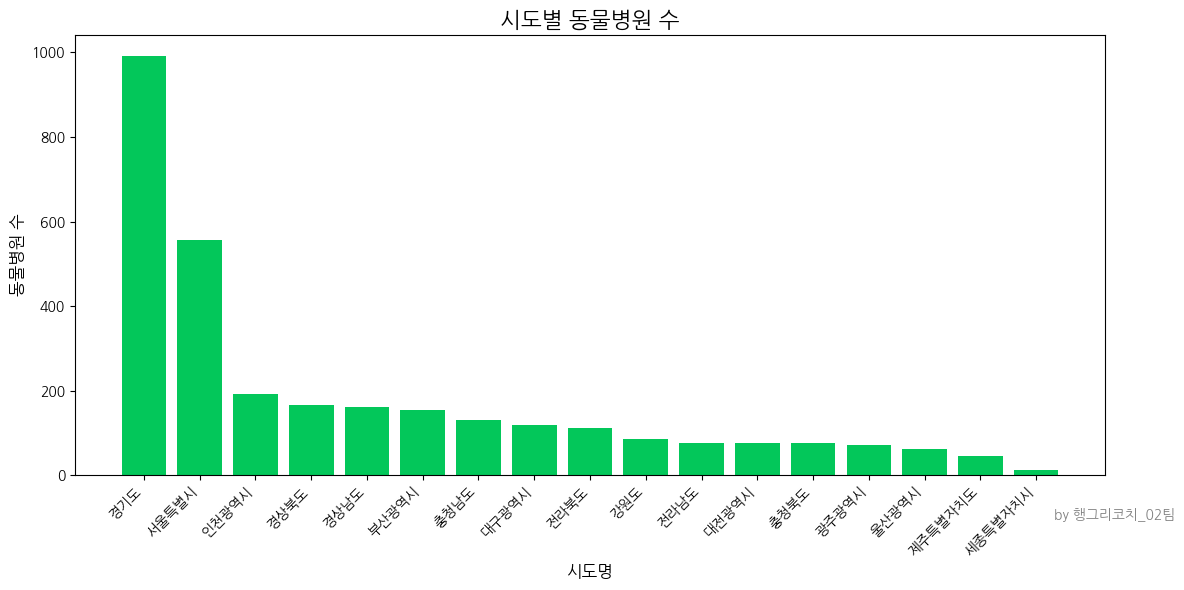

In [ ]:
import matplotlib.pyplot as plt

# 색상 설정
bar_color = '#03C75A'

# animal_hospital_by_sido 데이터프레임을 사용하여 막대 그래프 생성
plt.figure(figsize=(12, 6))  # 그래프 크기 설정

# 시도명을 x축으로, 동물병원 수를 y축으로 설정하고 색상 지정
plt.bar(animal_hospital_by_sido['시도명'], animal_hospital_by_sido['동물병원 수'], color=bar_color)

# 그래프 제목과 축 레이블 설정
plt.title('시도별 동물병원 수', fontsize=16)  # 제목 폰트 크기 조절
plt.xlabel('시도명', fontsize=12)  # x축 레이블 폰트 크기 조절
plt.ylabel('동물병원 수', fontsize=12)  # y축 레이블 폰트 크기 조절

# x축 레이블을 45도 회전하여 가독성 향상
plt.xticks(rotation=45, ha='right', fontsize=10)  # 레이블 회전 및 폰트 크기 조절

# 그래프 오른쪽 하단에 텍스트 추가
plt.text(0.95, -0.1, 'by 행그리코치_02팀', fontsize=10, color='gray', transform=plt.gca().transAxes)

# 그래프 표시
plt.tight_layout()  # 레이아웃 조절
plt.show()


# Q3.
### 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.

- 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
- 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
- 비율이 높은 순서대로 정렬되게 구해주세요!
- 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
- 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!


In [ ]:
# 서울에 소재한 병원 중 상권업종소분류명에 '피부'나 '성형'이 들어간 분류명 찾기
skin_or_plastic_surgery = df[(df["상권업종소분류명"].str.contains("피부|성형")) & (df["시도명"] == "서울특별시")]

In [ ]:
# 시군구별 병원 수 구하기
hospitals_by_district = skin_or_plastic_surgery['시군구명'].value_counts()

In [ ]:
# 서울의 전체 병원 수 구하기
total_hospitals_in_seoul = df[(df["상권업종중분류명"] == "병원") & (df["시도명"]=="서울특별시")]
total_hospitals_in_seoul = total_hospitals_in_seoul["시군구명"].value_counts()

In [ ]:
# 비율 계산
ratios = hospitals_by_district / total_hospitals_in_seoul

# 비율을 높은 순서대로 정렬하고 소숫점 두 번째 자리까지 출력
ratios_sorted = ratios.sort_values(ascending=False).round(2)
ratios_sorted

강남구     0.24
서초구     0.17
마포구     0.09
서대문구    0.08
영등포구    0.08
강동구     0.07
중구      0.07
중랑구     0.07
강서구     0.07
양천구     0.07
송파구     0.06
광진구     0.06
은평구     0.06
성북구     0.06
구로구     0.06
금천구     0.05
노원구     0.05
성동구     0.05
강북구     0.05
용산구     0.05
관악구     0.04
동대문구    0.04
동작구     0.04
종로구     0.03
도봉구     0.02
Name: 시군구명, dtype: float64

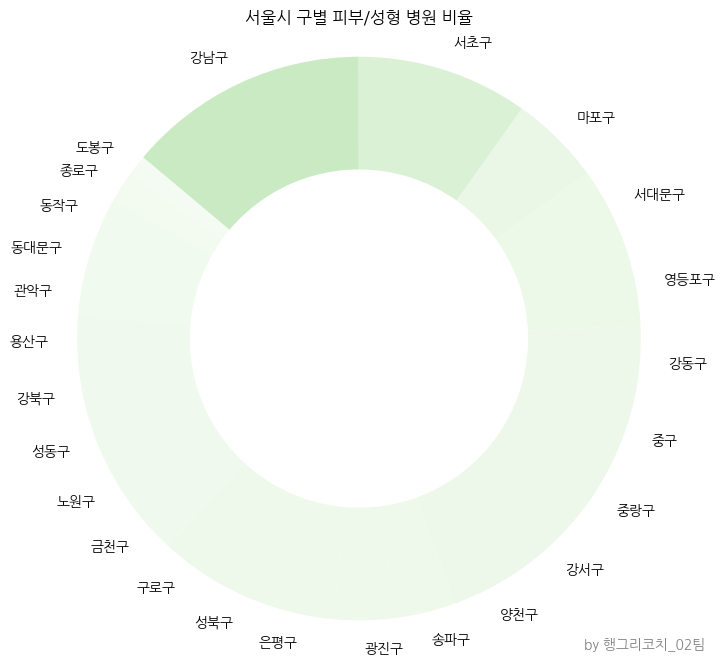

In [ ]:
import matplotlib.pyplot as plt

# 비율을 높은 순서대로 정렬한 데이터를 사용
plt.figure(figsize=(8, 8))  # 그래프 크기 설정

# 컬러맵을 'Greens'로 설정하여 초록색 그라데이션으로 표현
colors = plt.cm.Greens(ratios_sorted)

# 도넛 그래프 그리기
plt.pie(ratios_sorted, labels=ratios_sorted.index, startangle=140, counterclock=False, colors=colors, wedgeprops={'width': 0.4})

# 그래프 제목 설정
plt.title('서울시 구별 피부/성형 병원 비율')

# 그래프 표시
plt.axis('equal')  # 원 그래프를 원형으로 유지

# 그래프 오른쪽 하단에 텍스트 추가
plt.text(0.8, -1.1, 'by 행그리코치_02팀', fontsize=10, color='gray')

plt.show()

# Q4.
### 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

- folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
- 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
- folium 문서 : https://python-visualization.github.io/folium/quickstart.html



In [ ]:
import folium
from folium.plugins import MarkerCluster

In [ ]:
# 노인/치매병원 데이터 불러오기
senior_hospitals = df[df['상권업종소분류명'] == '노인/치매병원']

In [ ]:
# 기본 맵을 생성합니다.
m = folium.Map(location=[37.5665, 126.9780], zoom_start=7)

# 마커 클러스터를 생성합니다.
marker_cluster = MarkerCluster().add_to(m)

# 각 노인/치매병원에 대한 마커를 추가합니다.
for idx, row in senior_hospitals.iterrows():
    folium.Marker(
        location=[row['위도'], row['경도']],
        tooltip=row['상호명'],
        icon=folium.Icon(color='green', icon='info-sign')
    ).add_to(marker_cluster)

# 지도에 다른 타일 레이어 (OpenStreetMap)와 레이어 컨트롤을 추가합니다.
folium.TileLayer('openstreetmap').add_to(m)
folium.LayerControl().add_to(m)

# 최종적으로 지도를 'senior_hospitals_map.html' 파일로 저장합니다.
m.save('senior_hospitals_map.html')
m